# Pràctica 2- Títol

### Taula de continguts

* [Neteja de les dades](#neteja_de_les_dades)
    * [Secció 1.1. Selecció dades interès](#secció_1_1_selecció_dades_interès)
    * [Secció 1.2. Identificació zeros i elements buits](#secció_1_2_identificació_zeros_i_elements_buits)
    * [Secció 1.3. Identificació valors extrems](#secció_1_3_identificació_valors_extrems)  
    * [Secció 1.4. Exportació dades processades](#secció_1_4_exportació_dades_processades) 
    
* [Anàlisi de dades](#anàlisi_de_dades)
    * [Secció 2.1. Selecció de grups](#secció_2_1_selecció_de_grups)
    * [Secció 2.2 Comprovació normalitat i homogeneïtat de la variància](#secció_2_2_comprovació_normalitat_i_homogeneïtat_de_la_variància)

* [Proves estadístiques](#proves_estadístiques)


In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer

### Neteja de les dades <a class="anchor" id="neteja_de_les_dades"></a>

In [2]:
# Load movie dataframe

df = pd.read_excel('/Users/sgalan/Downloads/movie.xlsx', skiprows=[0])

In [3]:
# Overview dataframe

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

#### Secció 1.1. Selecció dades interès <a class="anchor" id="secció_1_1_selecció_dades_interès"></a>

In [5]:
keep = ['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 
        'actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'gross', 'genres',
        'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews', 'language', 'country',
        'content_rating', 'budget', 'title_year', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

filtered_df = df[keep]

#### Secció 1.2. Identificació zeros i elements buits <a class="anchor" id="secció_1_2_identificació_zeros_i_elements_buits"></a>

In [6]:
# Sum of NaN

for l in filtered_df.columns:
    count = filtered_df[l].isna().sum()
    print (l, count)

color 19
director_name 104
num_critic_for_reviews 50
duration 15
director_facebook_likes 104
actor_3_facebook_likes 23
actor_2_facebook_likes 13
actor_1_facebook_likes 7
gross 884
genres 0
num_voted_users 0
cast_total_facebook_likes 0
num_user_for_reviews 21
language 12
country 5
content_rating 303
budget 492
title_year 108
imdb_score 0
aspect_ratio 329
movie_facebook_likes 0


In [7]:
# remove NA from director_name, genres, language, country

remove_cols = ['director_name', 'genres', 'language', 'country', 'color', 'content_rating']
for r in remove_cols:
    filtered_df = filtered_df[filtered_df[r].notna()]

for l in filtered_df.columns:
    count = filtered_df[l].isna().sum()
    print (l, count)
    
print (np.shape(filtered_df))

color 0
director_name 0
num_critic_for_reviews 20
duration 2
director_facebook_likes 0
actor_3_facebook_likes 9
actor_2_facebook_likes 2
actor_1_facebook_likes 1
gross 569
genres 0
num_voted_users 0
cast_total_facebook_likes 0
num_user_for_reviews 4
language 0
country 0
content_rating 0
budget 333
title_year 0
imdb_score 0
aspect_ratio 185
movie_facebook_likes 0
(4657, 21)


In [9]:
# manage missing numerical values

num_cols = ['num_critic_for_reviews', 'duration', 'actor_3_facebook_likes', 'actor_2_facebook_likes', 
           'actor_1_facebook_likes', 'gross', 'num_user_for_reviews', 'budget', 'aspect_ratio']

imputer_KNN = KNNImputer(missing_values=np.nan, n_neighbors=3, weights="uniform", metric="nan_euclidean")

for c in num_cols:
    filtered_df[c] = imputer_KNN.fit_transform(filtered_df[c].values.reshape(-1, 1))

for l in filtered_df.columns:
    count = filtered_df[l].isna().sum()
    print (l, count)
    
print (np.shape(filtered_df))

color 0
director_name 0
num_critic_for_reviews 0
duration 0
director_facebook_likes 0
actor_3_facebook_likes 0
actor_2_facebook_likes 0
actor_1_facebook_likes 0
gross 0
genres 0
num_voted_users 0
cast_total_facebook_likes 0
num_user_for_reviews 0
language 0
country 0
content_rating 0
budget 0
title_year 0
imdb_score 0
aspect_ratio 0
movie_facebook_likes 0
(4657, 21)


#### Secció 1.3. Identificació valors extrems <a class="anchor" id="secció_1_3_identificació_valors_extrems"></a>

IQR of column  num_critic_for_reviews : 143.0
Number of outliers:  186
IQR of column  duration : 24.0
Number of outliers:  159
IQR of column  director_facebook_likes : 204.0
Number of outliers:  541
IQR of column  actor_3_facebook_likes : 497.0
Number of outliers:  172
IQR of column  actor_2_facebook_likes : 620.0
Number of outliers:  631
IQR of column  actor_1_facebook_likes : 10346.0
Number of outliers:  165
IQR of column  gross : 47673333.0
Number of outliers:  398
IQR of column  num_voted_users : 92421.0
Number of outliers:  436
IQR of column  cast_total_facebook_likes : 13046.0
Number of outliers:  307
IQR of column  num_user_for_reviews : 266.0
Number of outliers:  367
IQR of column  budget : 33280976.73635523
Number of outliers:  400
IQR of column  title_year : 11.0
Number of outliers:  338
IQR of column  imdb_score : 1.4000000000000004
Number of outliers:  106
IQR of column  aspect_ratio : 0.5
Number of outliers:  5
IQR of column  movie_facebook_likes : 6000.0
Number of outlier

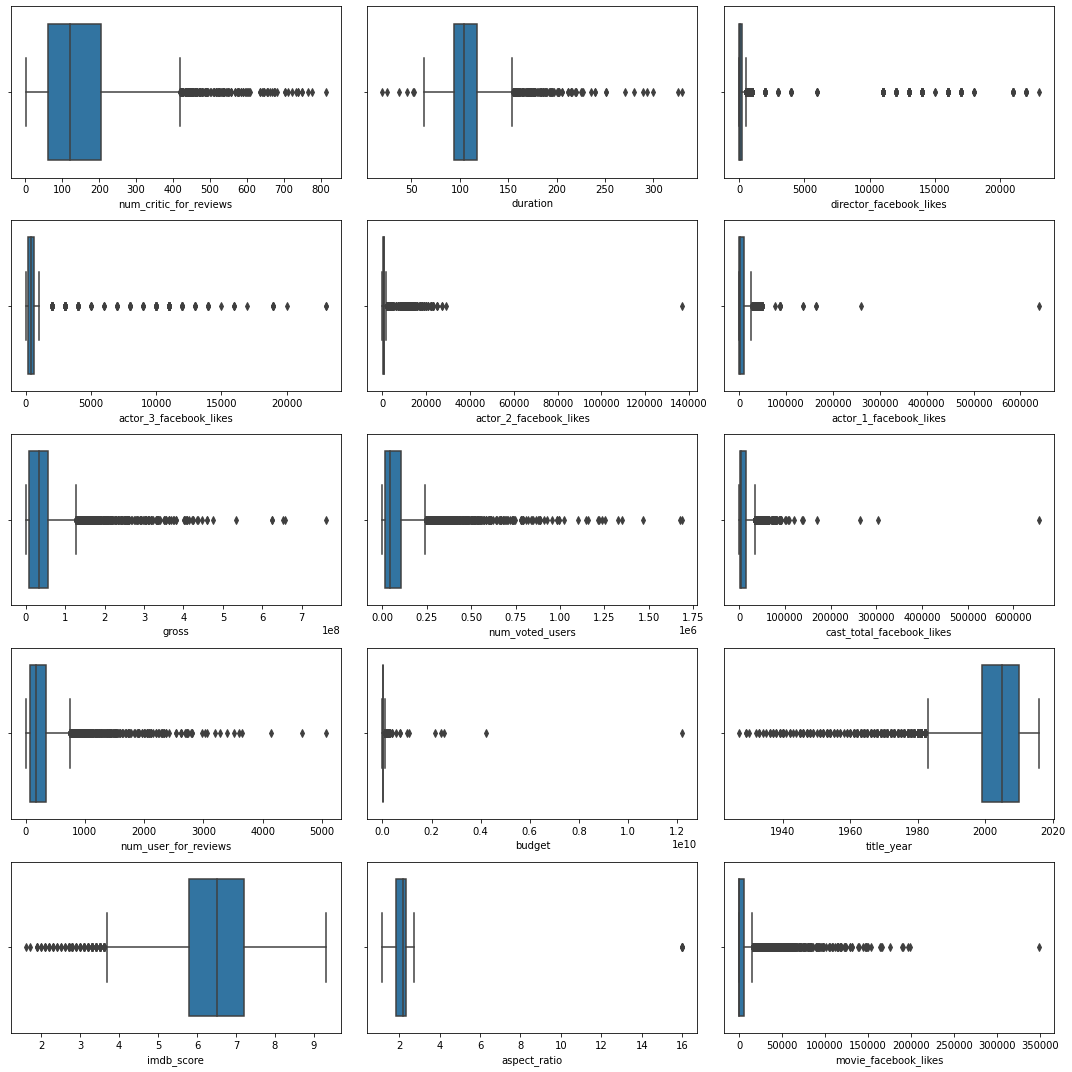

In [57]:
select_num = filtered_df.select_dtypes(include=['float64', 'int64'])
colnames = list(select_num.columns)

fig, axes = plt.subplots(nrows = int(np.shape(select_num)[1]/3), ncols = 3, figsize=(15,15))
y = 0
for name in colnames:
    i, j = divmod(y, 3)
    sns.boxplot(x=filtered_df[name], ax=axes[i, j])
    Q1 = filtered_df[name].quantile(0.25)
    Q3 = filtered_df[name].quantile(0.75)
    IQR = Q3 - Q1
    print('IQR of column ', name,':', IQR)
    outliers_lower = filtered_df[name] < (Q1 - 1.5 * IQR)
    outlier_higher = filtered_df[name] > (Q3 + 1.5 * IQR)
    print('Number of outliers: ',sum(outliers_lower) + sum(outlier_higher))
    #print(sum(outliers))
    y = y + 1


plt.tight_layout()
plt.show()

#### Secció 1.4. Exportació dades processades <a class="anchor" id="secció_1_4_exportació_dades_processades"></a>

### Anàlisi de dades <a class="anchor" id="anàlisi_de_dades"></a>

#### Secció 2.1. Selecció de grups <a class="anchor" id="secció_2_1_selecció_de_grups"></a>

#### Secció 2.2. Comprovació normalitat i homogeneïtat de la variància <a class="anchor" id="secció_2_2_comprovació_normalitat_i_homogeneïtat_de_la_variància"></a>

### Proves estadístiques <a class="anchor" id="proves_estadístiques"></a>